# Import the nessary Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Data

In [4]:
df=pd.read_csv('data.csv')

In [8]:
df.head()

id  Gender  Age  Driving_License  Region_Code  Previously_Insured  \
0   1    Male   44                1         28.0                   0   
1   2    Male   76                1          3.0                   0   
2   3    Male   47                1         28.0                   0   
3   4    Male   21                1         11.0                   1   
4   5  Female   29                1         41.0                   1   

  Vehicle_Age Vehicle_Damage  Annual_Premium  Policy_Sales_Channel  Vintage  \
0   > 2 Years            Yes         40454.0                  26.0      217   
1    1-2 Year             No         33536.0                  26.0      183   
2   > 2 Years            Yes         38294.0                  26.0       27   
3    < 1 Year             No         28619.0                 152.0      203   
4    < 1 Year             No         27496.0                 152.0       39   

   Response  
0         1  
1         0  
2         1  
3         0  
4         0

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


# Check the null values

In [12]:
print(df.isnull().sum())


id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64


In [14]:
df.describe()

id            Age  Driving_License    Region_Code  \
count  381109.000000  381109.000000    381109.000000  381109.000000   
mean   190555.000000      38.822584         0.997869      26.388807   
std    110016.836208      15.511611         0.046110      13.229888   
min         1.000000      20.000000         0.000000       0.000000   
25%     95278.000000      25.000000         1.000000      15.000000   
50%    190555.000000      36.000000         1.000000      28.000000   
75%    285832.000000      49.000000         1.000000      35.000000   
max    381109.000000      85.000000         1.000000      52.000000   

       Previously_Insured  Annual_Premium  Policy_Sales_Channel  \
count       381109.000000   381109.000000         381109.000000   
mean             0.458210    30564.389581            112.034295   
std              0.498251    17213.155057             54.203995   
min              0.000000     2630.000000              1.000000   
25%              0.000000    24405.000000             29.000000   
50%              0.000000    31669.000000            133.000000   
75%              1.000000    39400.000000            152.000000   
max              1.000000   540165.000000            163.000000   

             Vintage       Response  
count  381109.000000  381109.000000  
mean      154.347397       0.122563  
std        83.671304       0.327936  
min        10.000000       0.000000  
25%        82.000000       0.000000  
50%       154.000000       0.000000  
75%       227.000000       0.000000  
max       299.000000       1.000000

# Checking for white space

In [16]:
categorical_columns = df.select_dtypes(include=['object','int64','float64']).columns
for column in categorical_columns:
    print(f"Column {column} has {(df[column] == '').sum()} empty strings")


Column id has 0 empty strings
Column Gender has 0 empty strings
Column Age has 0 empty strings
Column Driving_License has 0 empty strings
Column Region_Code has 0 empty strings
Column Previously_Insured has 0 empty strings
Column Vehicle_Age has 0 empty strings
Column Vehicle_Damage has 0 empty strings
Column Annual_Premium has 0 empty strings
Column Policy_Sales_Channel has 0 empty strings
Column Vintage has 0 empty strings
Column Response has 0 empty strings


In [18]:
print(df['Response'].value_counts())


Response
0    334399
1     46710
Name: count, dtype: int64


In [20]:
print(df.nunique())

id                      381109
Gender                       2
Age                         66
Driving_License              2
Region_Code                 53
Previously_Insured           2
Vehicle_Age                  3
Vehicle_Damage               2
Annual_Premium           48838
Policy_Sales_Channel       155
Vintage                    290
Response                     2
dtype: int64


In [22]:
df.drop('id',axis=1,inplace=True)

# Visualize outliers

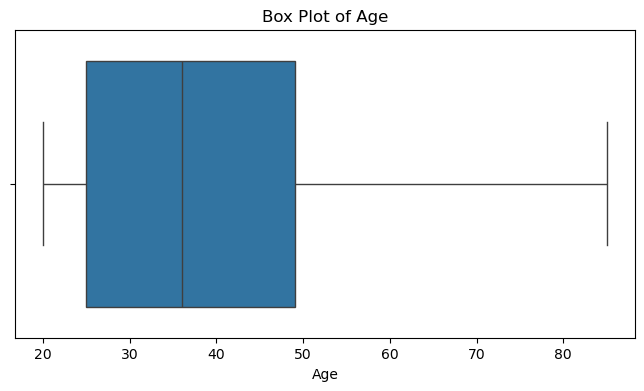

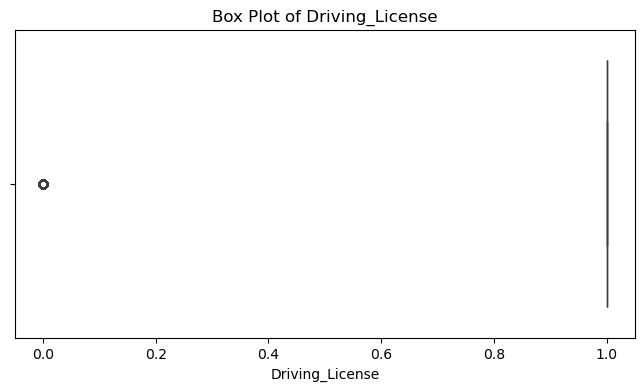

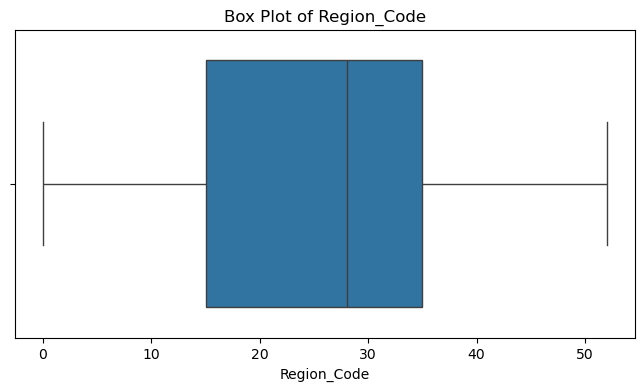

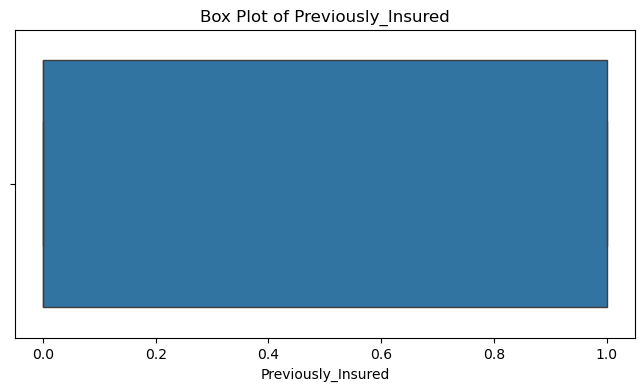

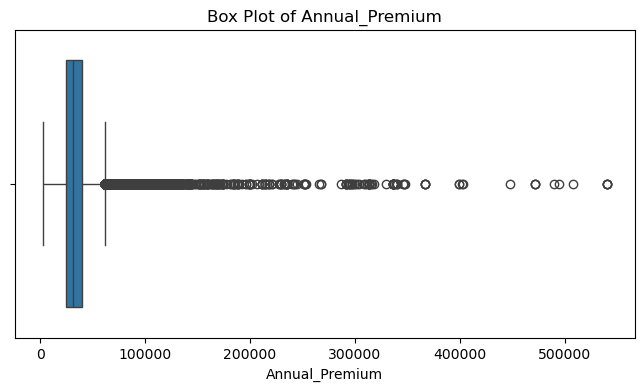

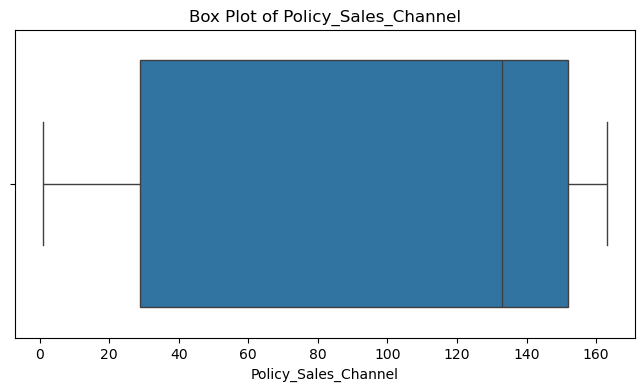

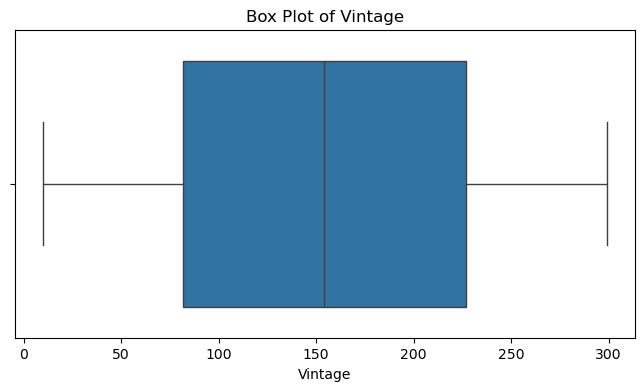

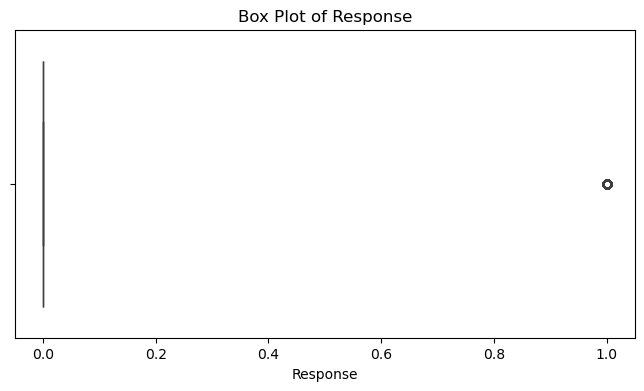

In [24]:
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
for column in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[column])
    plt.title(f'Box Plot of {column}')
    plt.show()


# Annual premium has outliers so visuvalize the distribution

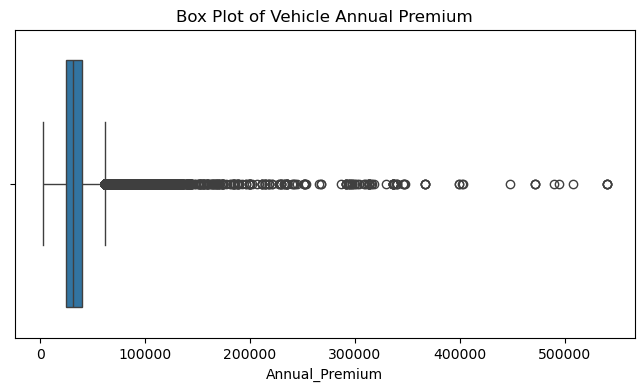

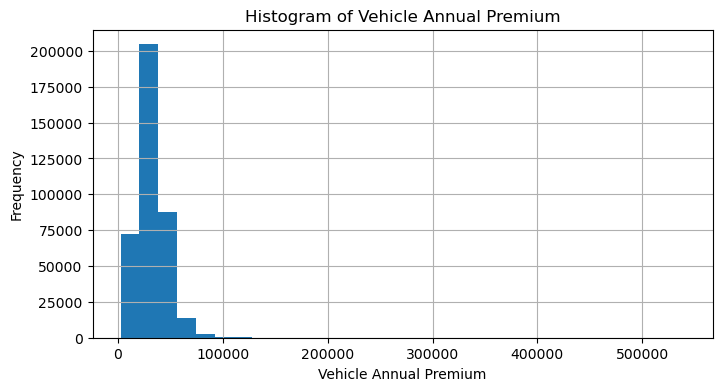

In [26]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['Annual_Premium'])
plt.title('Box Plot of Vehicle Annual Premium')
plt.show()


plt.figure(figsize=(8, 4))
df['Annual_Premium'].hist(bins=30)
plt.title('Histogram of Vehicle Annual Premium')
plt.xlabel('Vehicle Annual Premium')
plt.ylabel('Frequency')
plt.show()


# Fix  the outliers with z scores

In [28]:
import numpy as np
from scipy import stats

z_scores = np.abs(stats.zscore(df['Annual_Premium']))
threshold = 3

outliers = df[z_scores > threshold]
data= df[z_scores <= threshold]

median_value = df['Annual_Premium'].median()
df['Annual_Premium'] = np.where(z_scores > threshold, median_value, df['Annual_Premium'])


In [30]:
data.shape


(379026, 11)

In [32]:
df.shape

(381109, 11)

# visuvalizing after z scores

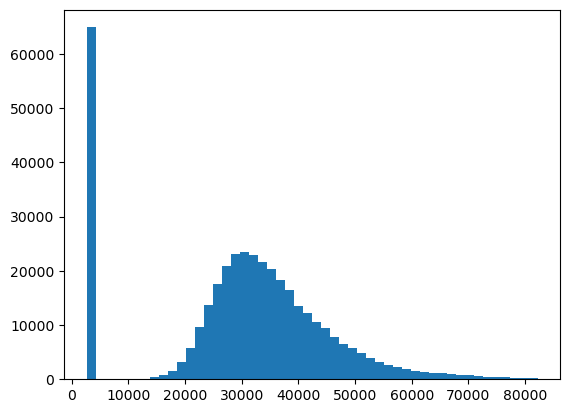

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.hist(data['Annual_Premium'], bins=50)
plt.show()


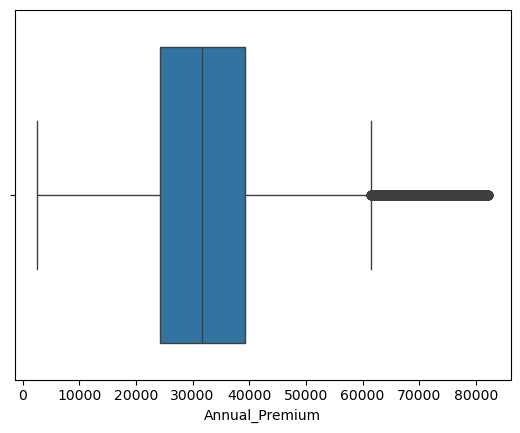

In [36]:
sns.boxplot(x=data['Annual_Premium'])
plt.show()


# Using IQR to still reduce the outliers

we are capping the values between q1 and q99 and plot them

C:\Users\Welcome\AppData\Local\Temp\ipykernel_16604\823248753.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Annual_Premium'] = np.where(


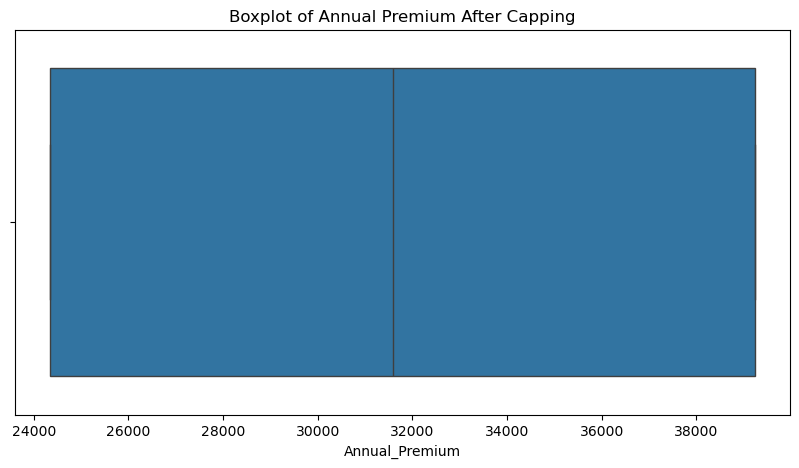

In [46]:
median_value = data['Annual_Premium'].median()
q1 = data['Annual_Premium'].quantile(0.25)
q3 = data['Annual_Premium'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

data['Annual_Premium'] = np.where(
    (data['Annual_Premium'] < lower_bound) | (data['Annual_Premium'] > upper_bound),
    median_value,
    data['Annual_Premium']
)


plt.figure(figsize=(10, 5))
sns.boxplot(x=data['Annual_Premium'])
plt.title('Boxplot of Annual Premium After Capping')
plt.show()


# Plot the distribution of the target variable

As mentioned above there is class imbalance

C:\Users\Welcome\AppData\Local\Temp\ipykernel_16604\1818250228.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Response', data=df, palette=['red', 'grey'])


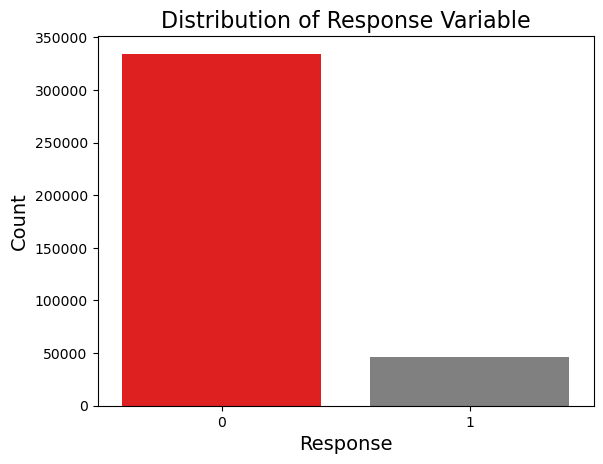

In [48]:
sns.countplot(x='Response', data=df, palette=['red', 'grey'])
plt.title('Distribution of Response Variable', fontsize=16)
plt.xlabel('Response', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

# This class imbalance which may cause trouble in model performance and bias So we need to fix them

# Converting the categorical values to Numeric

In [50]:
data['Gender']=data['Gender'].map({'Male':1,'Female':0})
data['Vehicle_Age']=data['Vehicle_Age'].map({'1-2 Year':0,'< 1 Year':1,'> 2 Year':2})
data['Vehicle_Damage'] =data['Vehicle_Damage'].map({'Yes':1,'No':0})

C:\Users\Welcome\AppData\Local\Temp\ipykernel_16604\187559897.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Gender']=data['Gender'].map({'Male':1,'Female':0})
C:\Users\Welcome\AppData\Local\Temp\ipykernel_16604\187559897.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Vehicle_Age']=data['Vehicle_Age'].map({'1-2 Year':0,'< 1 Year':1,'> 2 Year':2})
C:\Users\Welcome\AppData\Local\Temp\ipykernel_16604\187559897.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice

# Correlation map

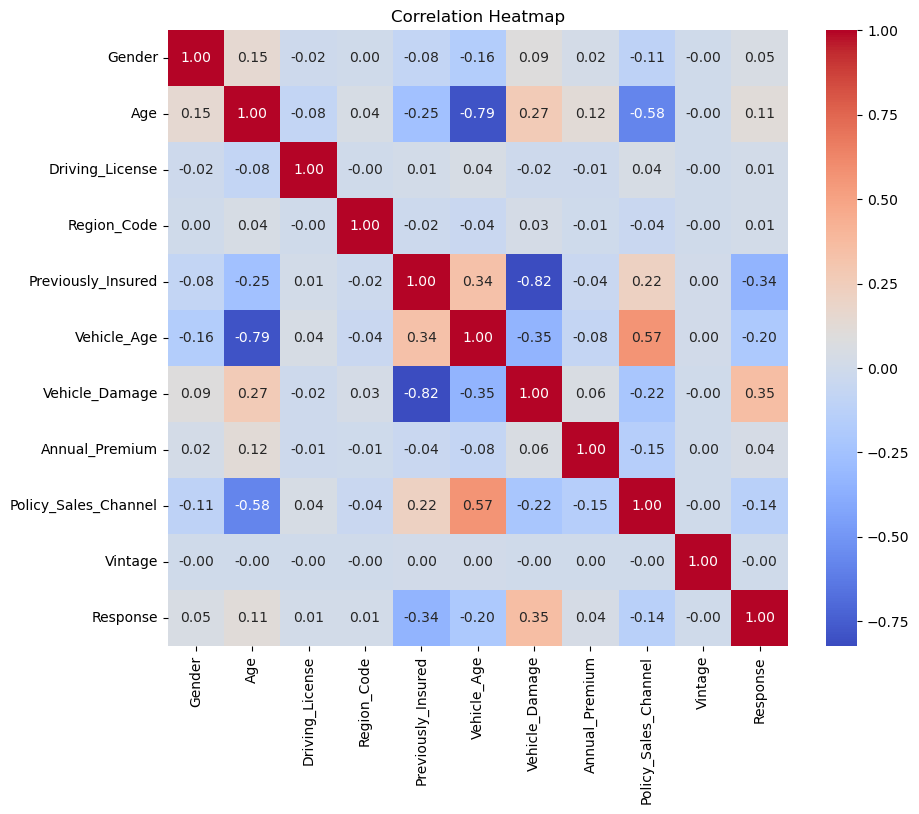

In [52]:

plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


No major correlation between the target and feature

In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 379026 entries, 0 to 381108
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Gender                379026 non-null  int64  
 1   Age                   379026 non-null  int64  
 2   Driving_License       379026 non-null  int64  
 3   Region_Code           379026 non-null  float64
 4   Previously_Insured    379026 non-null  int64  
 5   Vehicle_Age           363169 non-null  float64
 6   Vehicle_Damage        379026 non-null  int64  
 7   Annual_Premium        379026 non-null  float64
 8   Policy_Sales_Channel  379026 non-null  float64
 9   Vintage               379026 non-null  int64  
 10  Response              379026 non-null  int64  
dtypes: float64(4), int64(7)
memory usage: 34.7 MB


# Using smote to oversample the minority data to clear class imbalance

In [56]:
pip install imbalanced-learn


In [58]:
X = data.drop('Response', axis=1)
y = data['Response']


In [60]:
data_clean = data.dropna()
print(data_clean.isna().sum())


Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64


# Chi square test to check relations

In [67]:
import pandas as pd
from scipy.stats import chi2_contingency

categorical_columns = ['Gender', 'Driving_License', 'Region_Code', 'Previously_Insured', 
                       'Vehicle_Age', 'Vehicle_Damage', 'Policy_Sales_Channel']

for col in categorical_columns:
    contingency_table = pd.crosstab(df[col], df['Response'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    
    print(f"\nChi-Square Test between {col} and Response")
    print(f"Chi-Square Statistic: {chi2}")
    print(f"P-value: {p}")
    print(f"Degrees of Freedom: {dof}")
    print(f"Expected Frequencies: \n{expected}")
    

    if p < 0.05:
        print(f"Reject the null hypothesis: There is a significant association between {col} and Response.")
    else:
        print(f"Fail to reject the null hypothesis: {col} and Response are independent.")



Chi-Square Test between Gender and Response
Chi-Square Statistic: 1047.7077577887574
P-value: 7.665800628415621e-230
Degrees of Freedom: 1
Expected Frequencies: 
[[153568.9605336  21451.0394664]
 [180830.0394664  25258.9605336]]
Reject the null hypothesis: There is a significant association between Gender and Response.

Chi-Square Test between Driving_License and Response
Chi-Square Statistic: 38.63411722321234
P-value: 5.111753504019177e-10
Degrees of Freedom: 1
Expected Frequencies: 
[[7.12478551e+02 9.95214492e+01]
 [3.33686521e+05 4.66104786e+04]]
Reject the null hypothesis: There is a significant association between Driving_License and Response.

Chi-Square Test between Region_Code and Response
Chi-Square Statistic: 7267.842468803051
P-value: 0.0
Degrees of Freedom: 52
Expected Frequencies: 
[[1.77329945e+03 2.47700553e+02]
 [8.84456132e+02 1.23543868e+02]
 [3.54308915e+03 4.94910852e+02]
 [8.11716635e+03 1.13383365e+03]
 [1.58026339e+03 2.20736613e+02]
 [1.12224146e+03 1.5675853

# Check if there are any rows left after imputation or dropping NaNs

In [64]:
print(X.isna().sum())  


Gender                      0
Age                         0
Driving_License             0
Region_Code                 0
Previously_Insured          0
Vehicle_Age             15857
Vehicle_Damage              0
Annual_Premium              0
Policy_Sales_Channel        0
Vintage                     0
dtype: int64


# There are missing values 

In [70]:
from sklearn.impute import SimpleImputer

Use Simpleimputer to fill the value

In [72]:
imputer = SimpleImputer(strategy='most_frequent')
X['Vehicle_Age'] = imputer.fit_transform(X[['Vehicle_Age']])
print(X['Vehicle_Age'].isna().sum())  # Should be 0 after imputation


0


In [74]:
print(X.isna().sum())

Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
dtype: int64


In [104]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 379026 entries, 0 to 381108
Data columns (total 10 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Gender                379026 non-null  int64  
 1   Age                   379026 non-null  int64  
 2   Driving_License       379026 non-null  int64  
 3   Region_Code           379026 non-null  float64
 4   Previously_Insured    379026 non-null  int64  
 5   Vehicle_Age           379026 non-null  float64
 6   Vehicle_Damage        379026 non-null  int64  
 7   Annual_Premium        379026 non-null  float64
 8   Policy_Sales_Channel  379026 non-null  float64
 9   Vintage               379026 non-null  int64  
dtypes: float64(4), int64(6)
memory usage: 39.9 MB


In [76]:
X_cleaned, y_cleaned = X.dropna(), y[X.dropna().index]
print(X_cleaned.shape)
print(y_cleaned.shape)


(379026, 10)
(379026,)


# SMOTE

In [78]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

print(y_cleaned.value_counts())
over = SMOTE(sampling_strategy=1)  

steps = [('o', over)]
pipeline = Pipeline(steps=steps)

X_resampled, y_resampled = pipeline.fit_resample(X_cleaned, y_cleaned)
print(y_resampled.value_counts())


Response
0    332638
1     46388
Name: count, dtype: int64
Response
1    332638
0    332638
Name: count, dtype: int64


As mentione above to treat the class imbalance we use SMOTE(to over sample the minority Classes) it helps the model to perform without Bias

# Lets train with randomforestclassifier

In [80]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split,cross_val_score


X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

rf_model = RandomForestClassifier(random_state=42, n_jobs=-1)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='accuracy')

print("Cross-Validation Scores (Training):", cv_scores)
print("Mean CV Accuracy (Training):", cv_scores.mean())

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.86      0.88     99691
           1       0.87      0.91      0.89     99892

    accuracy                           0.89    199583
   macro avg       0.89      0.89      0.89    199583
weighted avg       0.89      0.89      0.89    199583

Confusion Matrix:
[[85709 13982]
 [ 8583 91309]]
Cross-Validation Scores (Training): [0.88258409 0.88061929 0.87973888 0.88142326 0.8803818 ]
Mean CV Accuracy (Training): 0.8809494665071849


In [82]:
from sklearn.metrics import accuracy_score
test_accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", test_accuracy)

Test Accuracy: 0.8869392683745609


Number of feature columns: 10
Number of feature importances: 10


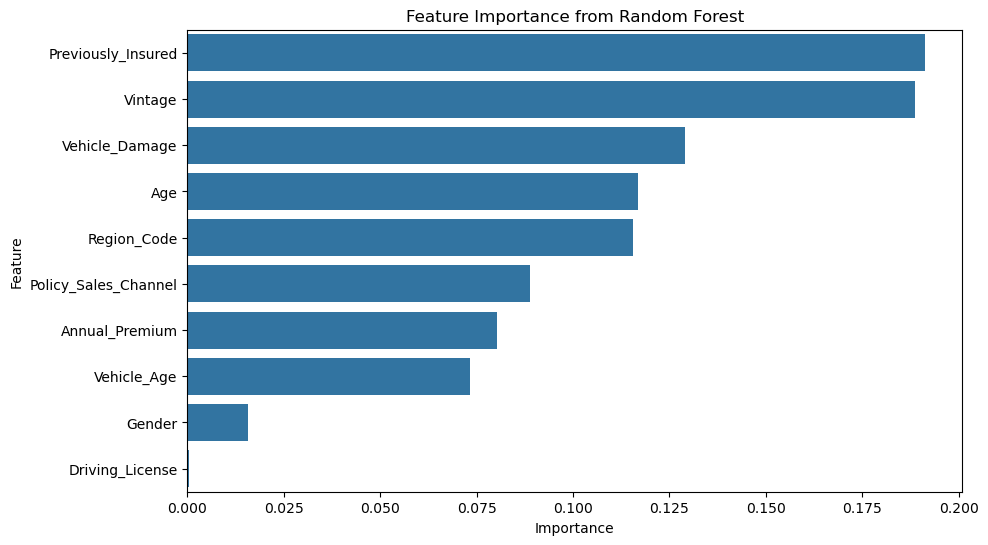

In [84]:
feature_columns = X_train.columns  
importances =rf_model.feature_importances_

print(f"Number of feature columns: {len(feature_columns)}")
print(f"Number of feature importances: {len(importances)}")

if len(feature_columns) == len(importances):
    feature_importance_df = pd.DataFrame({
        'Feature': feature_columns,
        'Importance': importances
    }).sort_values(by='Importance', ascending=False)
    

    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
    plt.title('Feature Importance from Random Forest')
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.show()
else:
    print("Mismatch between feature columns and feature importances.")


# Training With other models

# DessionTreeClassifier

In [86]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


decision_tree = DecisionTreeClassifier(
    max_depth=10,              
    min_samples_split=10,       
    min_samples_leaf=5,        
    random_state=42            
)

decision_tree.fit(X_train, y_train)


y_pred_train = decision_tree.predict(X_train)
y_pred_test = decision_tree.predict(X_test)

training_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

print("Training Accuracy (Decision Tree):", training_accuracy)
print("Test Accuracy (Decision Tree):", test_accuracy)

print("\nClassification Report (Decision Tree - Test):")
print(classification_report(y_test, y_pred_test))

print("\nConfusion Matrix (Decision Tree - Test):")
print(confusion_matrix(y_test, y_pred_test))


Training Accuracy (Decision Tree): 0.8255009201340797
Test Accuracy (Decision Tree): 0.8241082657340555

Classification Report (Decision Tree - Test):
              precision    recall  f1-score   support

           0       0.88      0.75      0.81     99691
           1       0.78      0.90      0.84     99892

    accuracy                           0.82    199583
   macro avg       0.83      0.82      0.82    199583
weighted avg       0.83      0.82      0.82    199583


Confusion Matrix (Decision Tree - Test):
[[74347 25344]
 [ 9761 90131]]


# AdaBoostClassifier

In [88]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix


X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)


ada_boost = AdaBoostClassifier(n_estimators=100, random_state=42)
ada_boost.fit(X_train, y_train)


y_pred1 = ada_boost.predict(X_test)


print("Classification Report:\n", classification_report(y_test, y_pred1))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred1))


C:\Users\Welcome\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.73      0.80     66285
           1       0.77      0.91      0.84     66771

    accuracy                           0.82    133056
   macro avg       0.83      0.82      0.82    133056
weighted avg       0.83      0.82      0.82    133056

Confusion Matrix:
 [[48351 17934]
 [ 5829 60942]]


In [90]:
test_accuracy = accuracy_score(y_test, y_pred1)
print("Test Accuracy (Decision Tree):", test_accuracy)

Test Accuracy (Decision Tree): 0.8214060245310245


# Logistic Regression

In [92]:
from sklearn.linear_model import LogisticRegression

l_model = LogisticRegression(max_iter=2000,solver='lbfgs')
l_model.fit(X_train,y_train)

y_pred2 = l_model.predict(X_test)

print("Classification Report:\n", classification_report(y_test, y_pred2))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred2))


C:\Users\Welcome\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.65      0.75     66285
           1       0.73      0.92      0.81     66771

    accuracy                           0.79    133056
   macro avg       0.81      0.79      0.78    133056
weighted avg       0.81      0.79      0.78    133056

Confusion Matrix:
 [[43176 23109]
 [ 5413 61358]]


In [98]:
test_accuracy = accuracy_score(y_test, y_pred2)
print("Test Accuracy (Decision Tree):", test_accuracy)

Test Accuracy (Decision Tree): 0.7856391293891294


# Save the file as pickle

Saving the randomforest model as it gives good accuracy for further deployment

In [109]:
import pickle
pickle.dump(rf_model,open('model.pkl','wb'))